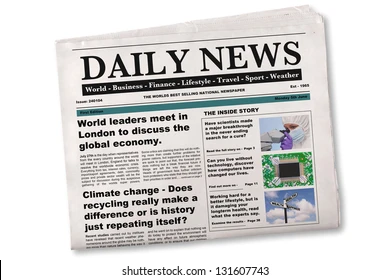

About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News

#importing the depencies

In [385]:
# importing the stopwords from corpus libraray in nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

In [386]:
# to view the stopwords 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [387]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#data collection and data exploration

In [388]:
df=pd.read_csv('/content/drive/MyDrive/fake-news/train.csv')

In [389]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [390]:
df.shape

(20800, 5)

#data cleaning

In [391]:
# checking duplicates in dataset
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [392]:
#replace the null value with the empty string
df=df.fillna('')

In [393]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [394]:
#combining the author and title attributes for prediction
df['content']=df['author']+' '+df['title']

In [395]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [396]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [397]:
#separating the x and y
x= df.drop(columns='label', axis=1)
y= df['label']

In [398]:
print(x)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

visualization

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns

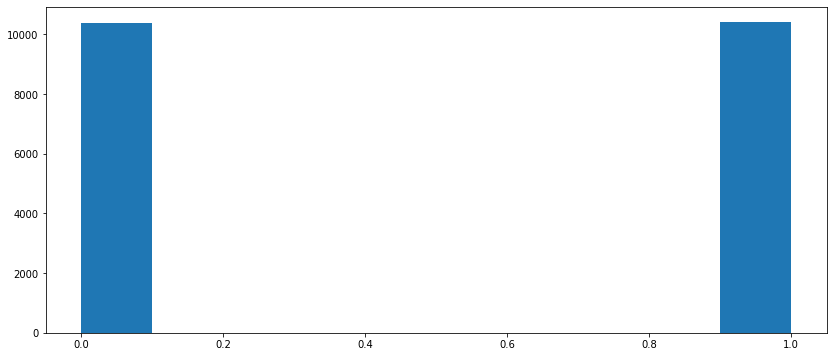

In [400]:
plt.figure(figsize=(14,6))
plt.hist(df["label"])
plt.show()

#stemming

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas". Stemming is important in natural language understanding (NLU) and natural language processing (NLP).


example: actor, actress, acting --> act

In [401]:
# importing the regular expression -- to predict the word is present or not in text
#importing the poster stemmer -- to remove the suffixes and prefixes
import re
from nltk.stem.porter import PorterStemmer
port_stem=PorterStemmer()

In [402]:
# here i def function to remove the number,symbols present in text
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [403]:
# here i apply thye function in content
df['content'] = df['content'].apply(stemming)

In [404]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [405]:
# separating x and y
x=df['content'].values

In [406]:
x

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [407]:
y=df['label']

In [408]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [409]:
x.shape

(20800,)

In [410]:
y.shape

(20800,)

In [411]:
# x value are in text so we want to convert them into number so i used TfidfVectorizer from feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
x=vector.fit_transform(x)

In [412]:
print(x)

  (0, 15686)	0.28485063562728646
  (0, 2483)	0.3676519686797209
  (0, 7692)	0.24785219520671603
  (0, 8630)	0.29212514087043684
  (0, 2959)	0.2468450128533713
  (0, 13473)	0.2565896679337957
  (0, 4973)	0.233316966909351
  (0, 267)	0.27010124977708766
  (0, 3792)	0.2705332480845492
  (0, 7005)	0.21874169089359144
  (0, 8909)	0.3635963806326075
  (0, 3600)	0.3598939188262559
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 16799)	0.30071745655510157
  (1, 1497)	0.2939891562094648
  (1, 2813)	0.19094574062359204
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  (2, 15611)	0.41544962664721613
  (2, 2943)	0.3179886800654691
  :	:
  (20797, 1287)	0.3353805680413986
  (20797, 13122)	0.24825263521976057
  (20797, 12344)	0.27263457663336677
  (20797, 14967)	0.3115945315488075
  (20797, 12138)	0.24778257724396505
  (20797, 9518)	0.295420

In [413]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

#sepating the dataset

In [414]:
from sklearn. model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y,random_state=2)

In [415]:
x_train.shape

(16640, 17128)

In [416]:
y_train.shape

(16640,)

In [417]:
x_test.shape

(4160, 17128)

#LogisticRegression

In [418]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [419]:
# fitting the model
model.fit(x_train,y_train)

LogisticRegression()

#prediction using test data 

In [420]:
# predicting the model
y_pred=model.predict(x_test)

In [421]:
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [422]:
print(y_pred)

[1 0 1 ... 1 1 0]


In [423]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_pred,y_test)
score

0.9865985576923076

In [424]:
from sklearn.metrics import recall_score
recall_score=recall_score(y_pred,y_test)
recall_score

0.9659197012138189

In [425]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_pred,y_test)
confusion_matrix

array([[2004,   14],
       [  73, 2069]])

#result of test dataset

In [426]:
print("ACCURACY_SCORE:",accuracy_score)
print("RECALL_SCORE:",recall_score)
print("CONFUSION_MATRIX:",confusion_matrix)

ACCURACY_SCORE: 0.9790865384615385
RECALL_SCORE: 0.9659197012138189
CONFUSION_MATRIX: [[2004   14]
 [  73 2069]]


#predicting using the train dataset

In [427]:
y_pred=model.predict(x_train)

In [428]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [429]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_pred,y_train)
score

0.9865985576923076

In [430]:
from sklearn.metrics import recall_score
recall_score=recall_score(y_pred,y_train)
recall_score

0.9794204612655234

In [431]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_pred,y_train)
confusion_matrix

array([[8136,   49],
       [ 174, 8281]])

#result of train dataset

In [432]:
print("ACCURACY_SCORE:",accuracy_score)
print("RECALL_SCORE:",recall_score)
print("CONFUSION_MATRIX:",confusion_matrix)

ACCURACY_SCORE: 0.9865985576923076
RECALL_SCORE: 0.9794204612655234
CONFUSION_MATRIX: [[8136   49]
 [ 174 8281]]


#note:
above predicting using the train dataset is optional because i used to see wheather the model is overfitting or not 

if prediction using the train dataset score is similar to
 prediction using the test dataset the model is not overfitted

#optional algorithm

In [433]:
'''#naive_bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)


y_pred=model.predict(x_test)
y_pred.shape


from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score
'''

'#naive_bayes\nfrom sklearn.naive_bayes import GaussianNB\nmodel=GaussianNB()\nmodel.fit(x_train,y_train)\n\n\ny_pred=model.predict(x_test)\ny_pred.shape\n\n\nfrom sklearn.metrics import accuracy_score\nscore=accuracy_score(y_pred,y_test)\nscore\n'

In [434]:
''' # k_nearest neighbors


from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)


y_pred=model.predict(x_test)
y_pred.shape

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score
'''

' # k_nearest neighbors\n\n\nfrom sklearn.neighbors import KNeighborsClassifier\nmodel= KNeighborsClassifier(n_neighbors=5)\nmodel.fit(x_train,y_train)\n\n\ny_pred=model.predict(x_test)\ny_pred.shape\n\nfrom sklearn.metrics import accuracy_score\nscore=accuracy_score(y_pred,y_test)\nscore\n'

In [435]:
'''# support vector machine
from sklearn.svm import SVC
model=SVC(kernel="linear",random_state=0)
model.fit(x_train,y_train)


y_pred=model.predict(x_test)
y_pred.shape


from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score
'''

'# support vector machine\nfrom sklearn.svm import SVC\nmodel=SVC(kernel="linear",random_state=0)\nmodel.fit(x_train,y_train)\n\n\ny_pred=model.predict(x_test)\ny_pred.shape\n\n\nfrom sklearn.metrics import accuracy_score\nscore=accuracy_score(y_pred,y_test)\nscore\n'

In [436]:
'''# DecisionTreeClassifier

 from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


y_pred=model.predict(x_test)
y_pred.shape


from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score
'''

'# DecisionTreeClassifier\n\n from sklearn.tree import DecisionTreeClassifier\nmodel=DecisionTreeClassifier()\nmodel.fit(x_train,y_train)\n\n\ny_pred=model.predict(x_test)\ny_pred.shape\n\n\nfrom sklearn.metrics import accuracy_score\nscore=accuracy_score(y_pred,y_test)\nscore\n'

#building the prediction system

In [437]:
news=x_test[9]
prediction=model.predict(news)

print(prediction)

if(prediction[0]==0):
  print("it is real news")
else:
    print("it is fake news")

[1]
it is fake news


#conclusion

In [438]:
# this model will predict the new is real or not based on parameter like author , title , text